In [29]:
from keras.applications.vgg16 import VGG16
# Load the pre-trained VGG16 model from Keras applications
model = VGG16()


In [30]:
# Print a summary of the VGG16 model to see its architecture, layer names, and shapes
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

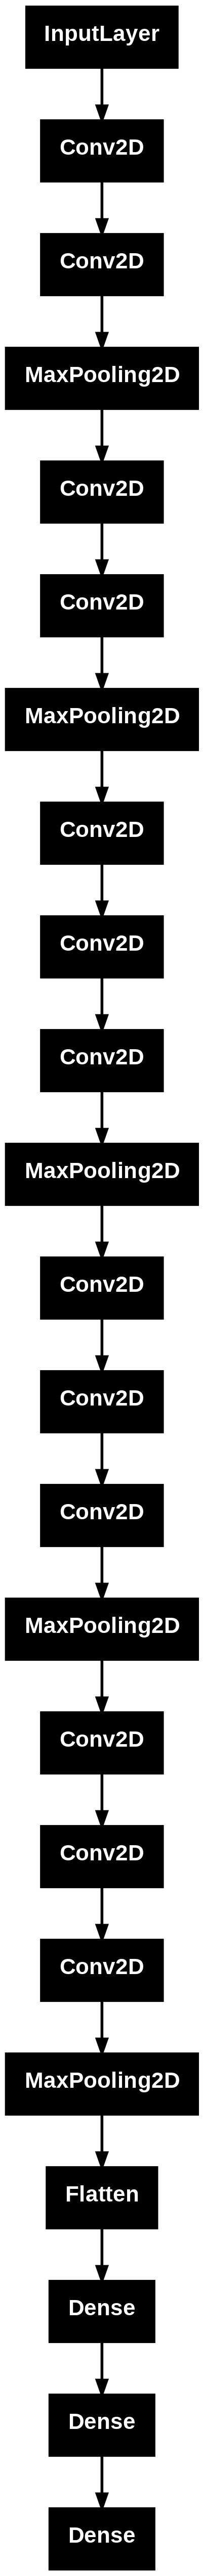

In [31]:
from keras.utils import plot_model
# Generate a plot of the model's architecture
plot_model(model)



In [32]:
# Iterate through each layer of the model to extract convolutional layer filters
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

#This block checks each layer to see if it is a convolutional layer (based on the name containing 'conv'). For such layers, it extracts and prints the shape of the filters, which are crucial for feature extraction in CNNs.

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [33]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [34]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#This normalizes the filter values to a range of 0-1 to make them suitable for visual representation, enhancing the interpretability of the filters.

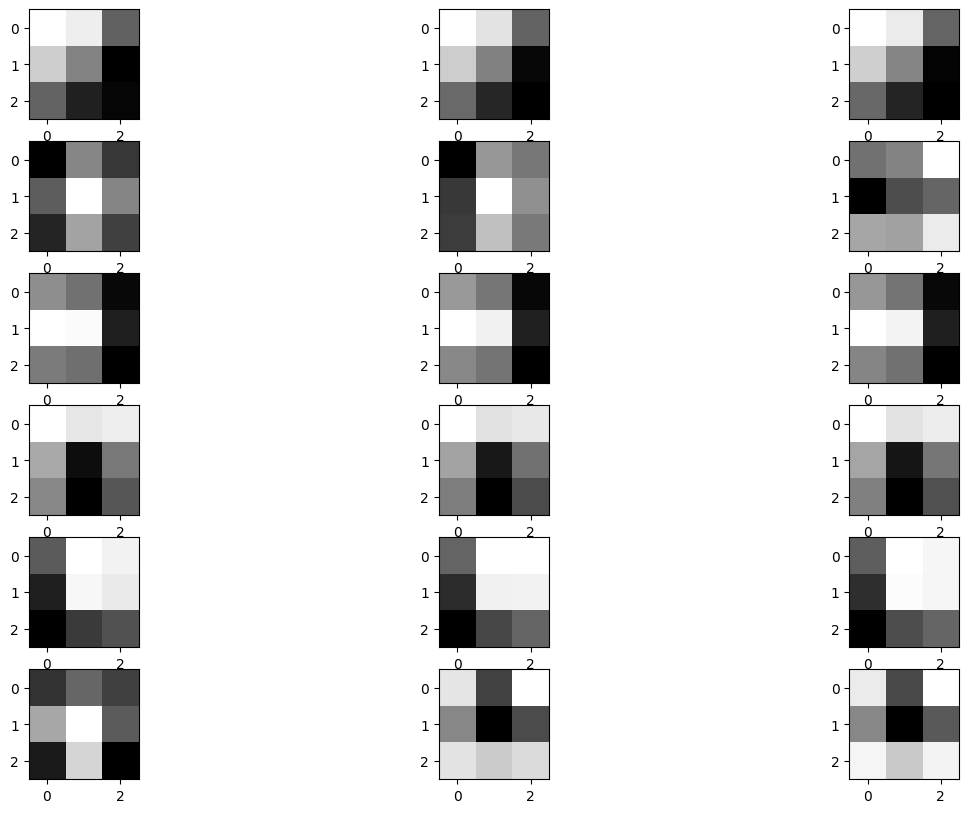

In [35]:
# Visualize the first six filters of the second convolutional layer
import matplotlib.pyplot as plt

n_filters = 6
ix = 1
fig = plt.figure(figsize=(15, 10))
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

#This code visualizes the first six filters of the normalized filter set from the second convolutional layer, displaying each of the three color channel components (assuming RGB images).

In [36]:
from tensorflow.keras.models import Model
# Create a new model that outputs the result of the first convolutional layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

#A new model is defined here that takes the same inputs as the original VGG16 but outputs the results right after the first convolutional layer. This allows for visualizing the feature maps generated at this stage.

In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the image with the specified target size
image = load_img("/content/kohli.jpg", target_size=(224, 224))

# Convert the image to an array
image = img_to_array(image)

# Expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

# Preprocess the image as required by the model's input
image = preprocess_input(image)

#Loads an image, resizes it to the input dimensions expected by VGG16 (224x224 pixels), converts it to an array, adds a batch dimension, and applies VGG16-specific preprocessing.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


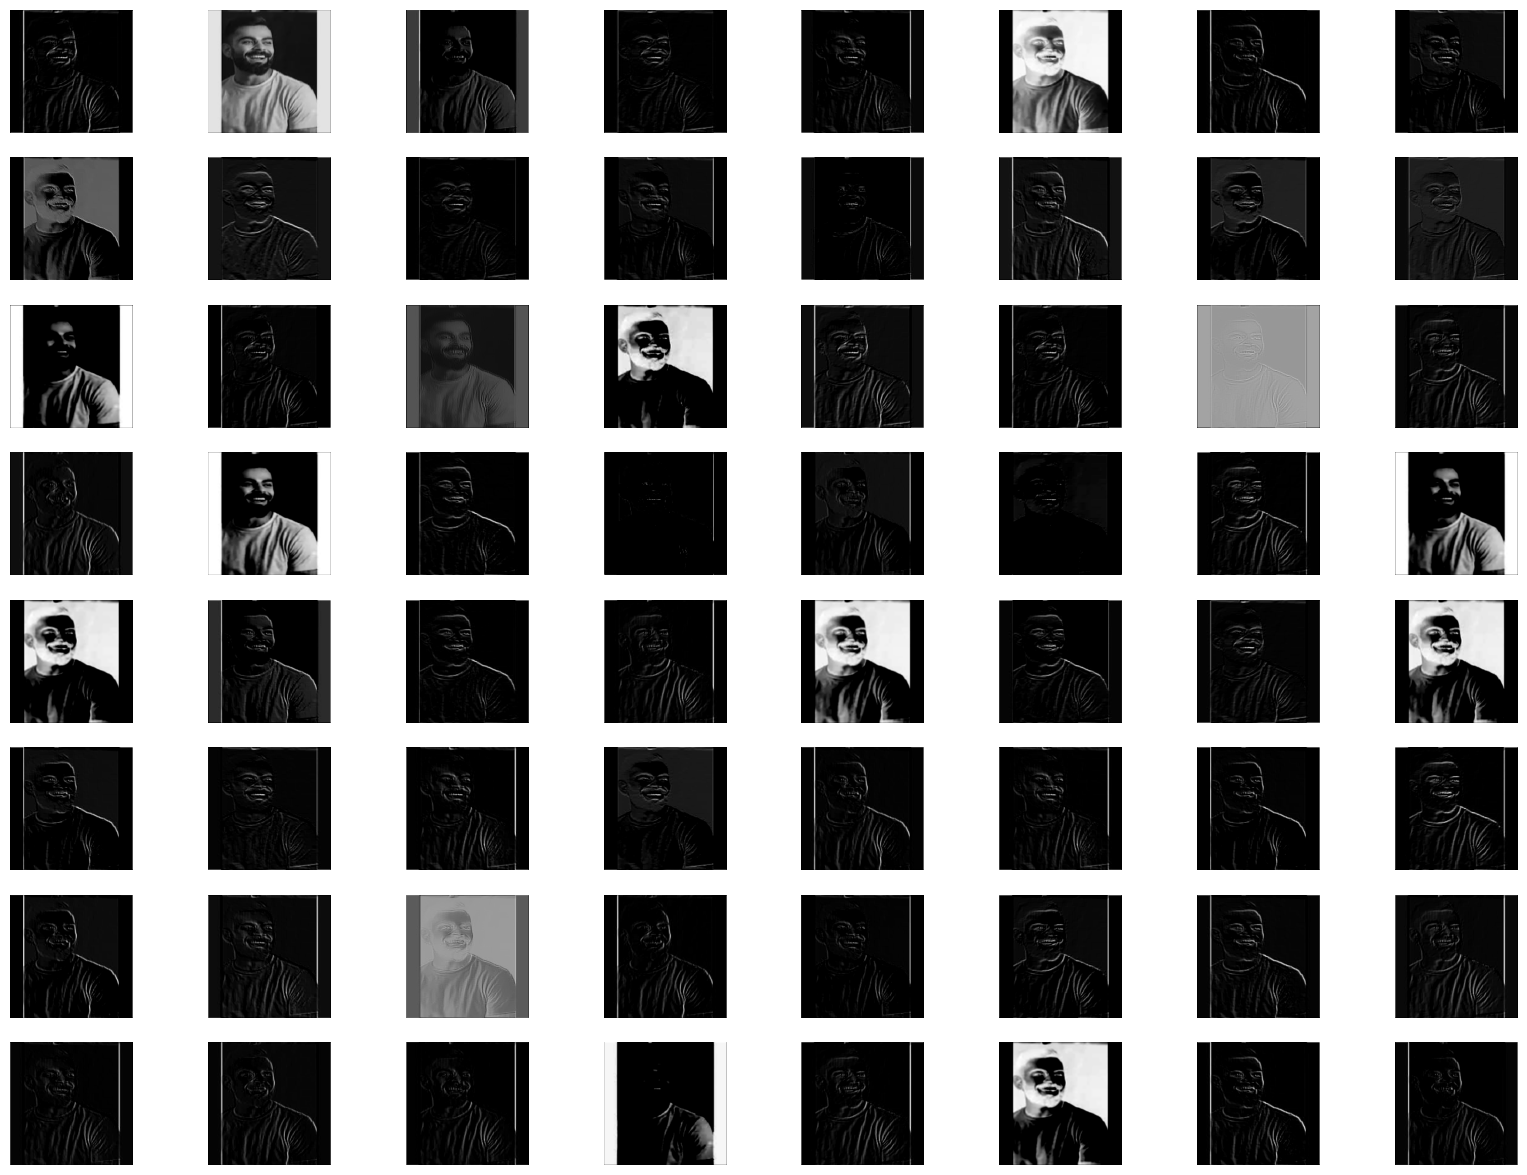

In [38]:
import matplotlib.pyplot as plt

# Assuming 'model' and 'image' are already defined and correctly configured
features = model.predict(image)

fig = plt.figure(figsize=(20, 15))
for i in range(1, features.shape[3]+1):  # Assuming the last dimension is the channel or feature map dimension
    ax = plt.subplot(8, 8, i)  # Adjust the subplot grid as necessary
    plt.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')  # Optionally, turn off the axis.

plt.show()

#Predicts the output of the new model using the prepared image, generating feature maps. These maps are visualized in an 8x8 grid, showing the activation of each filter in response to the input image.


In [39]:
# Create a model to fetch outputs from multiple specified layers
model2 = VGG16()

In [40]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)


#Defines a new model based on VGG16 that outputs activations from multiple intermediate layers, specified by their indices. This is useful for a deeper analysis of how different layers in the model respond to the same input image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


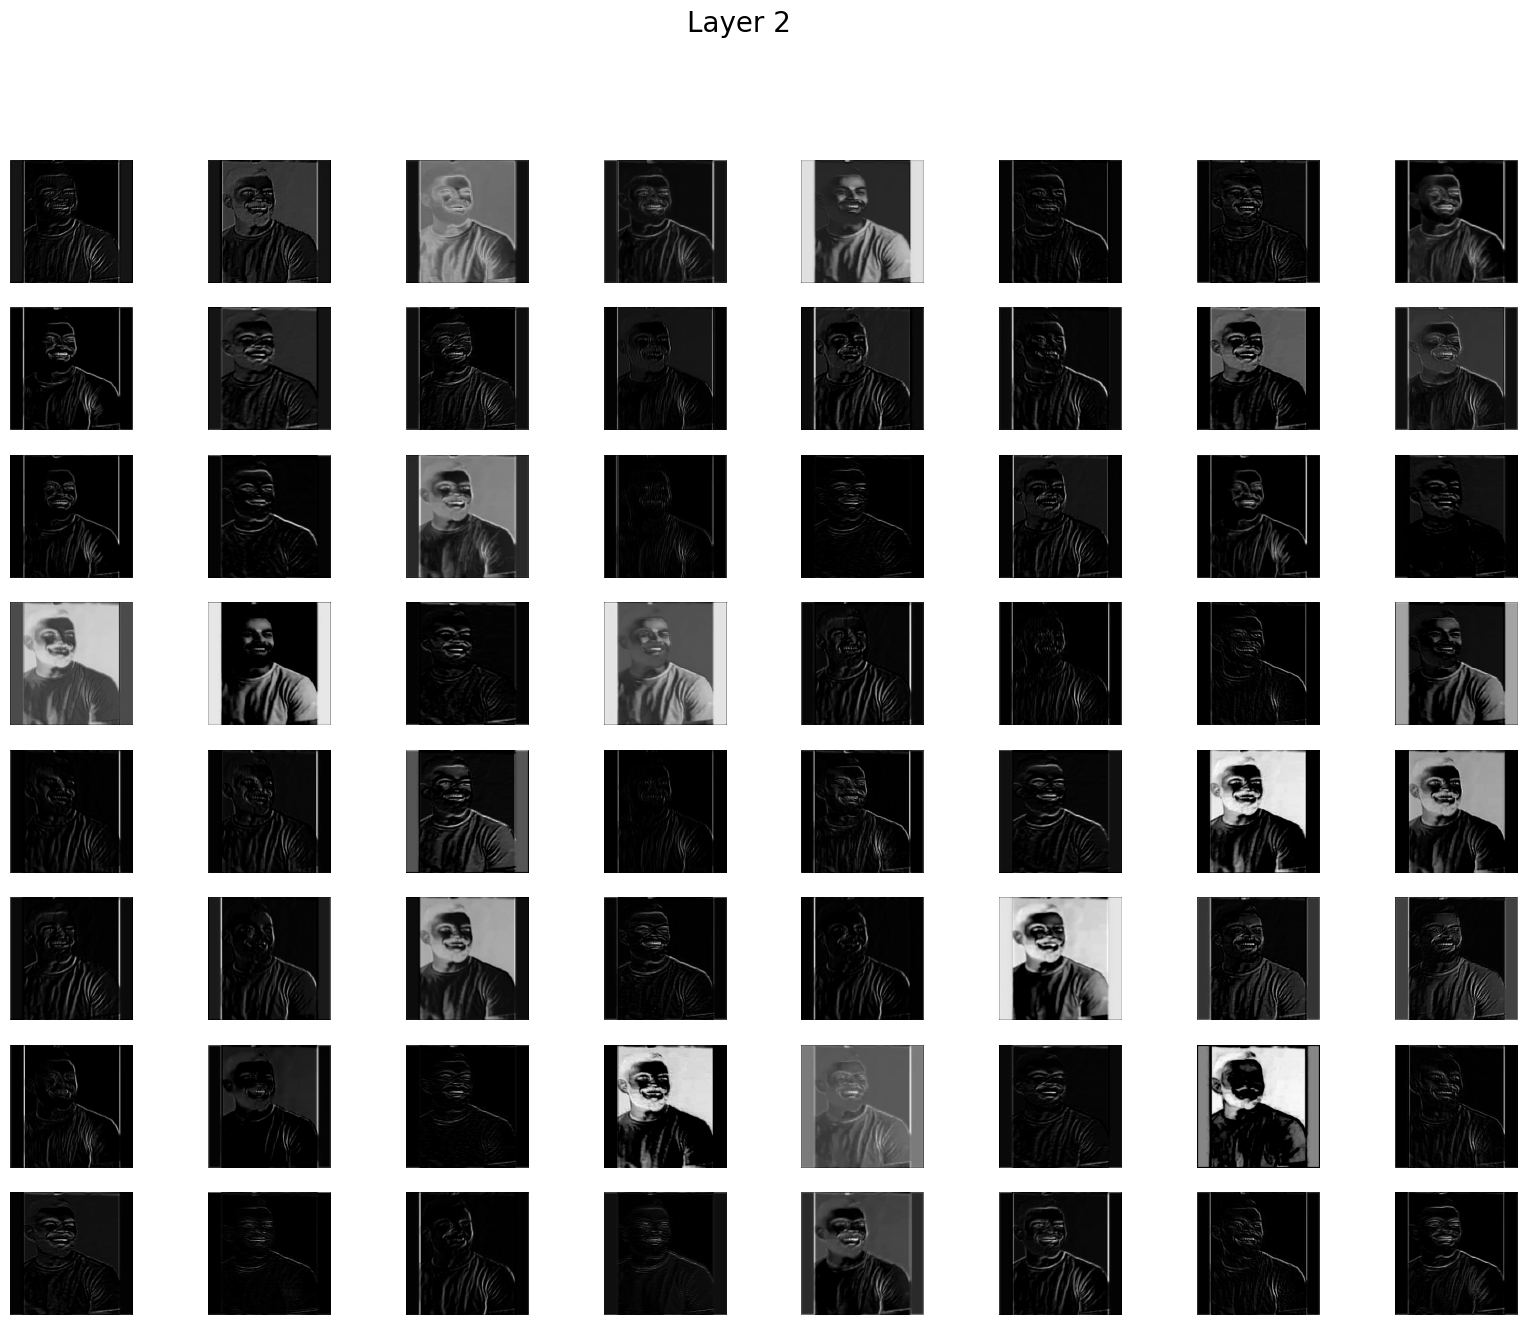

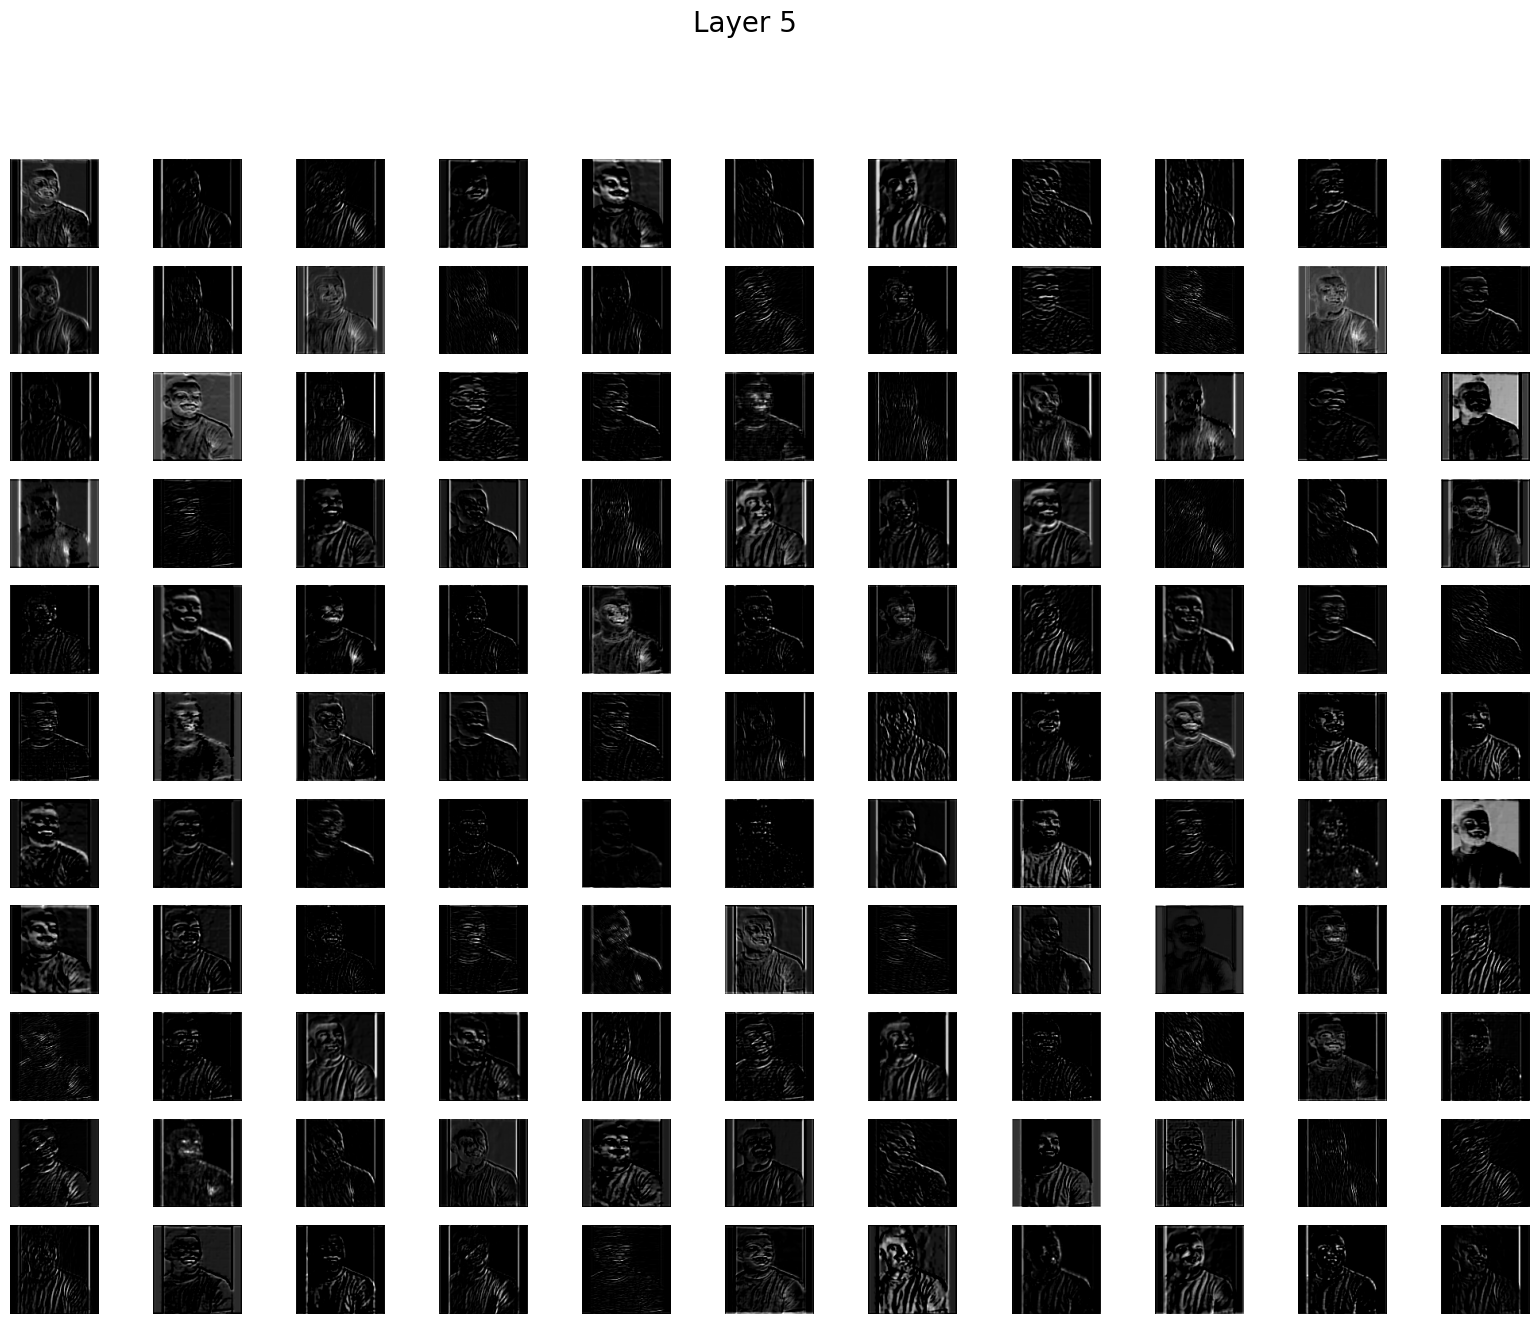

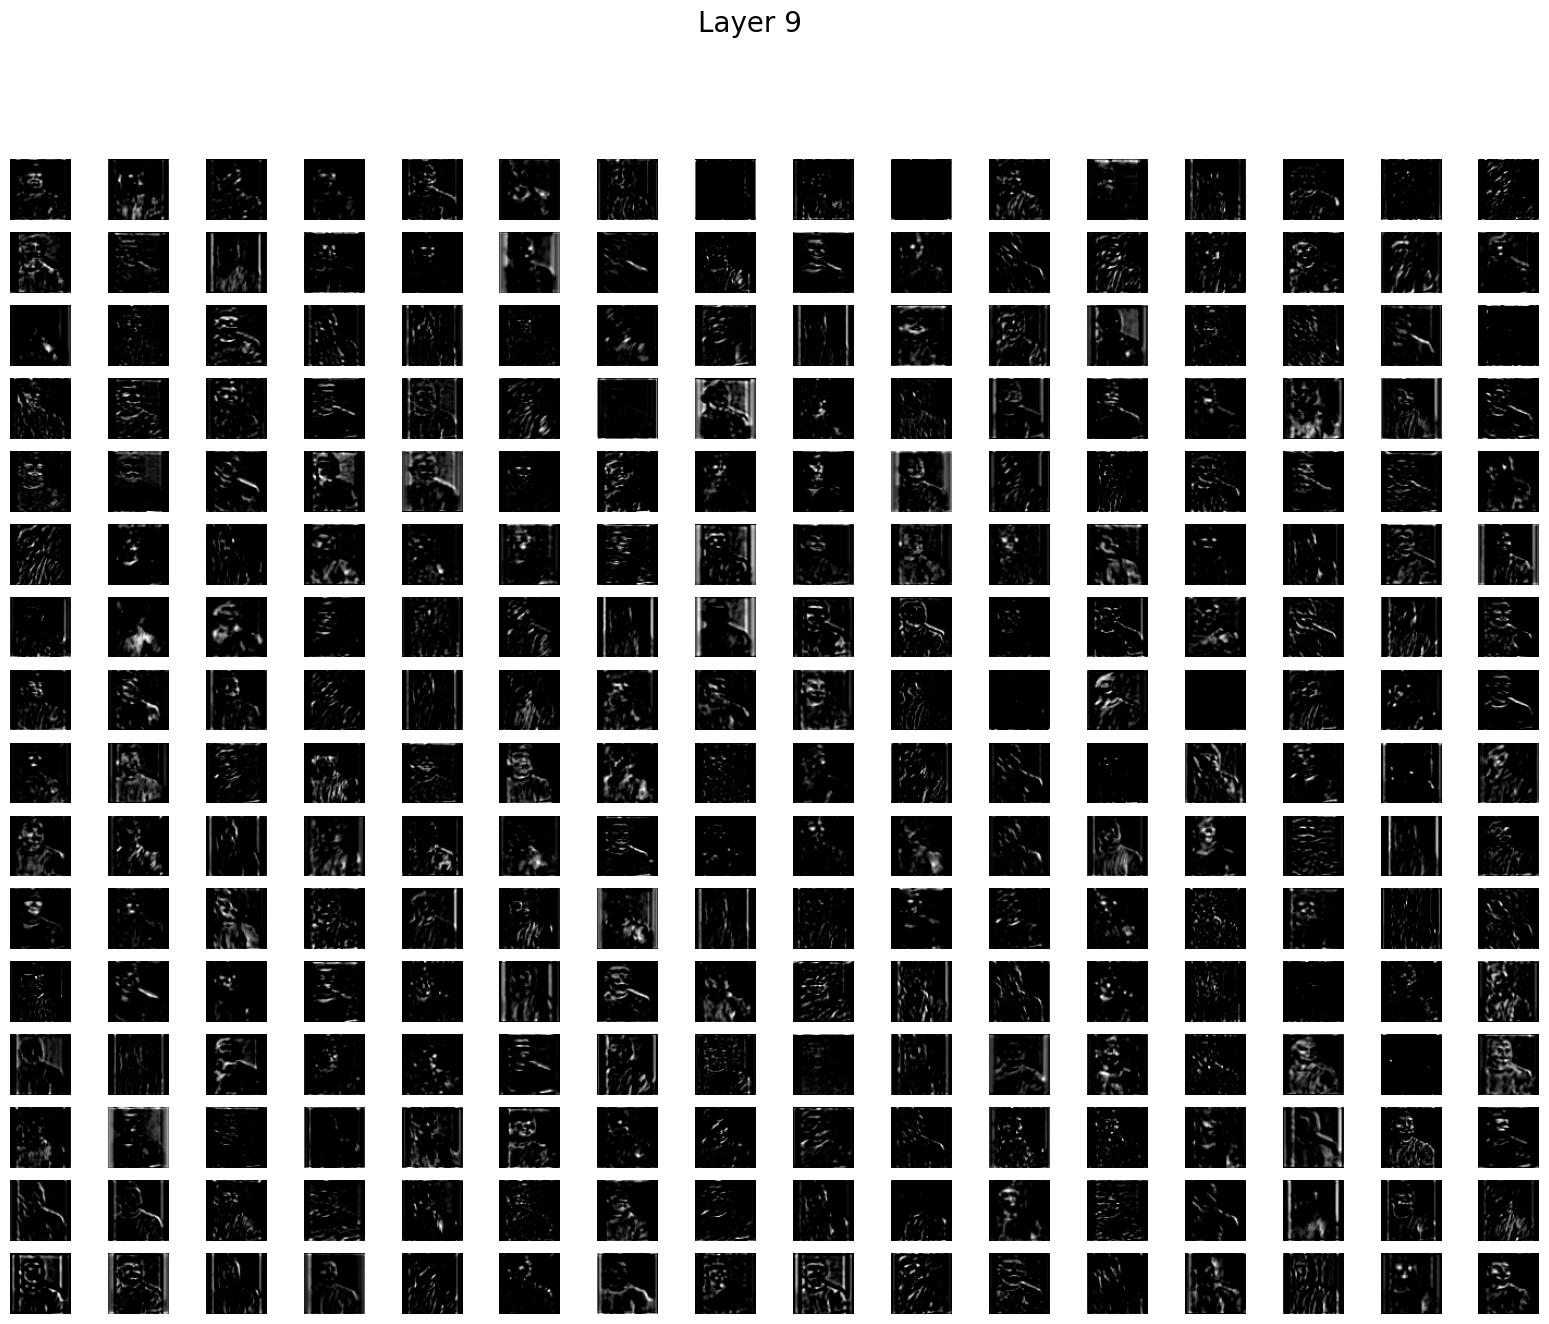

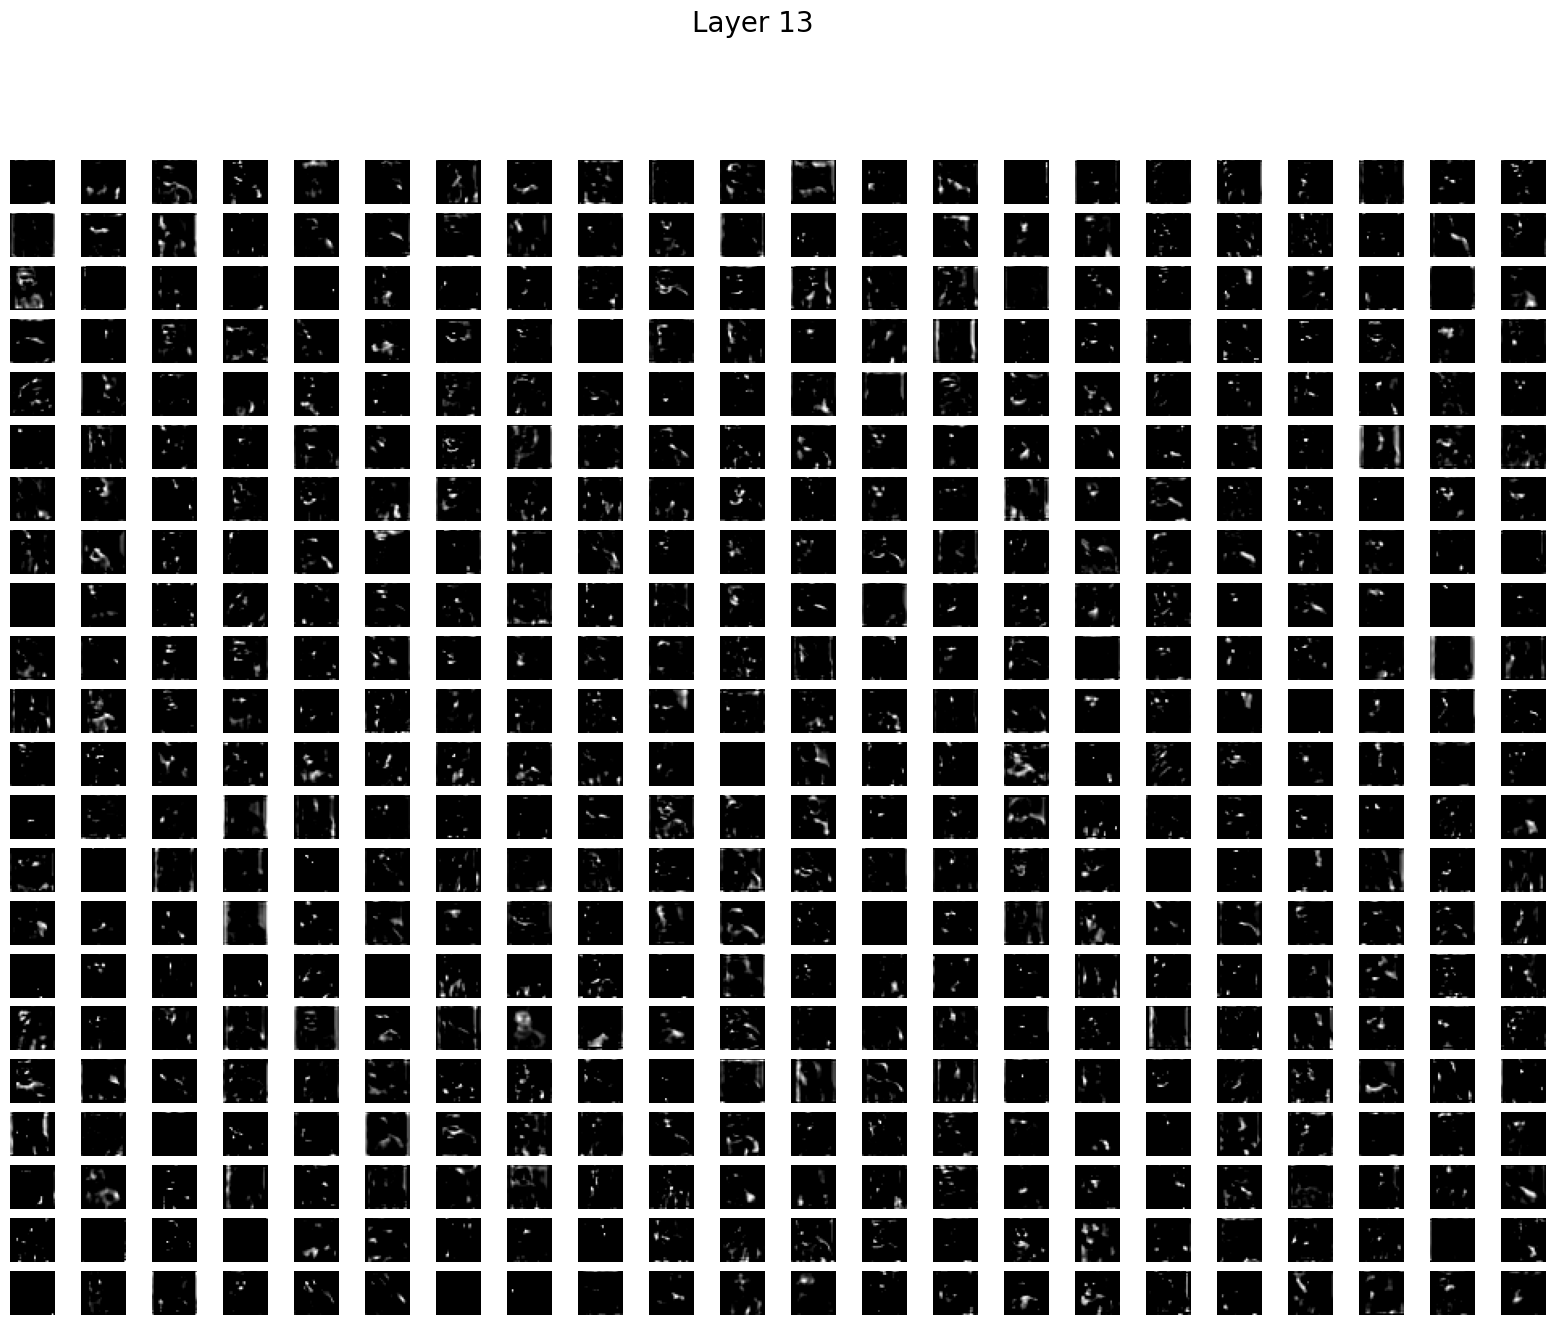

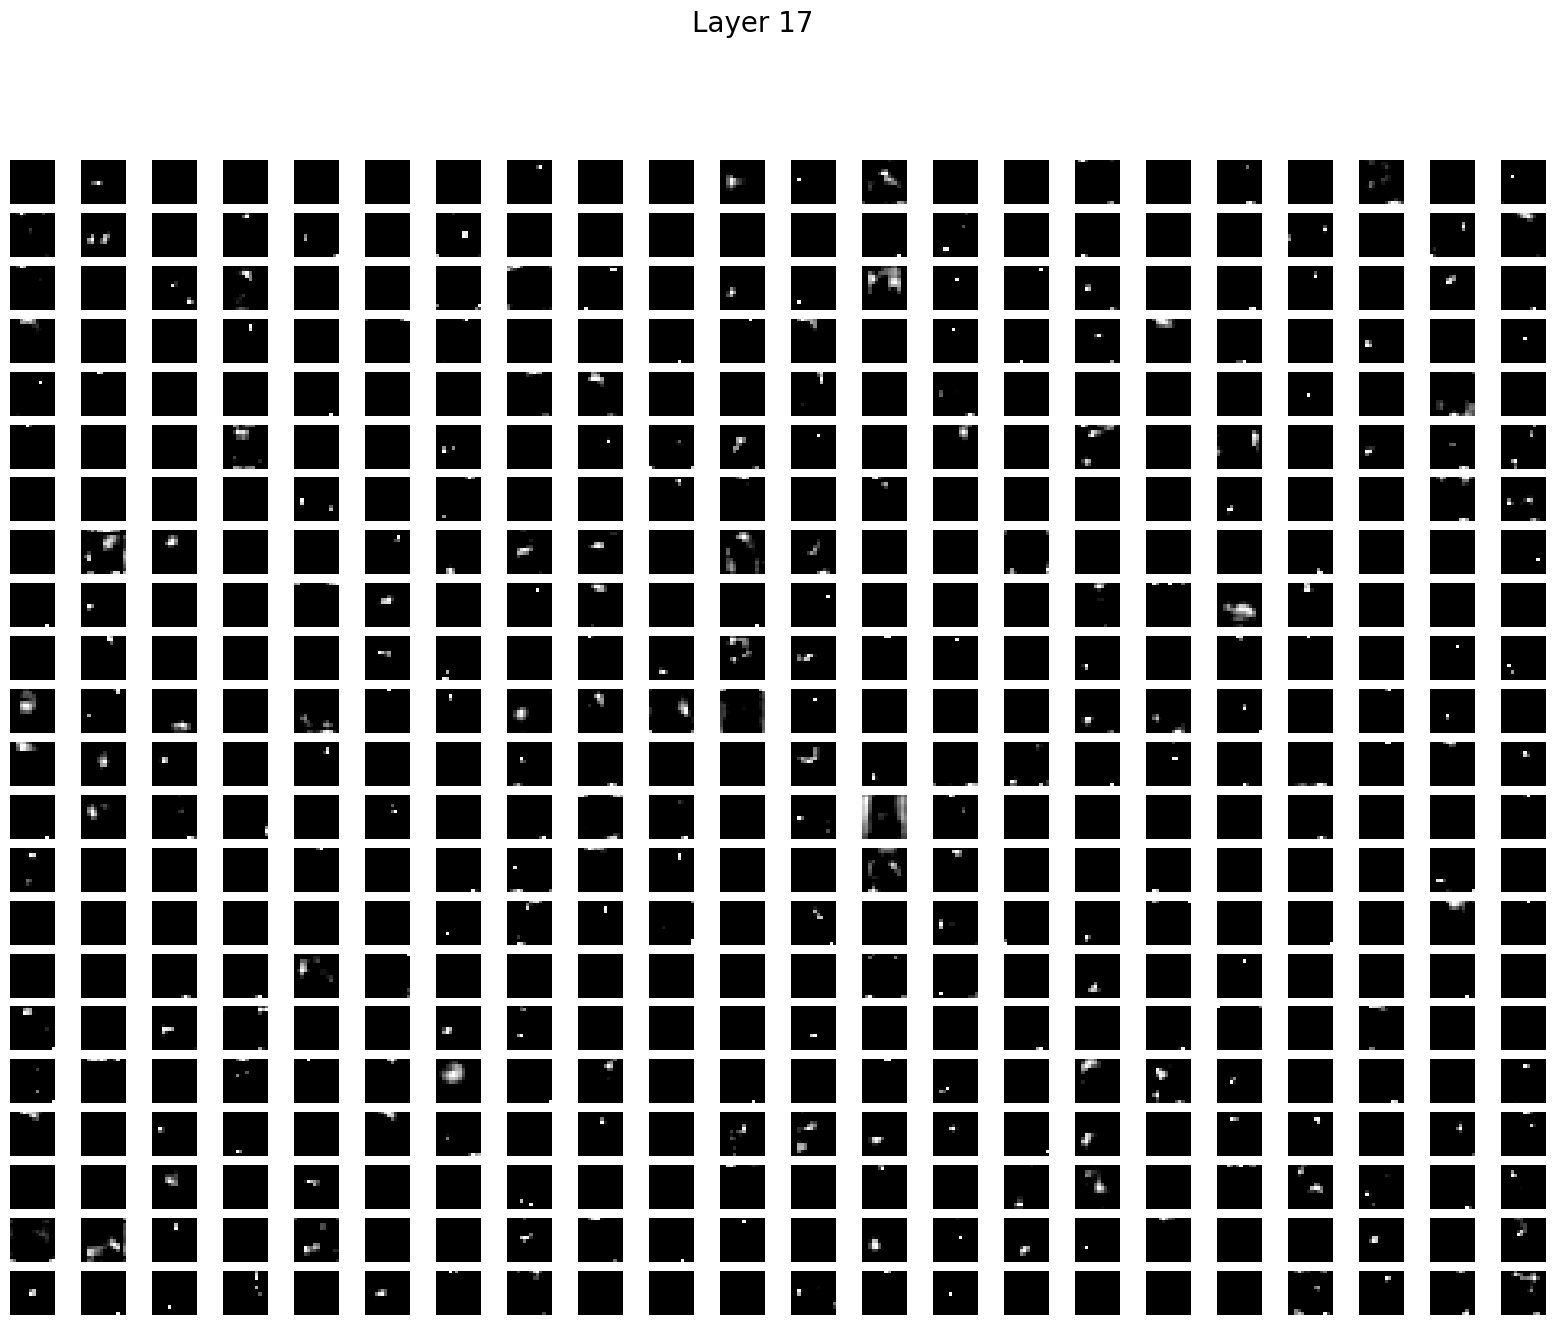

In [41]:
import matplotlib.pyplot as plt

feature_map = model3.predict(image)  # Ensure that 'model3' and 'image' are defined

for layer_idx, fmap in zip(layer_index, feature_map):
    num_filters = fmap.shape[3]
    rows = cols = int(num_filters**0.5)  # Create a square layout of subplots

    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Layer {}".format(layer_idx), fontsize=20)

    for i in range(1, num_filters + 1):
        if i > rows * cols:  # Check to ensure i does not exceed the number of subplots
            break  # Stop adding more subplots if the limit is reached

        ax = plt.subplot(rows, cols, i)  # Create subplot
        plt.imshow(fmap[0, :, :, i-1], cmap='gray')
        plt.axis('off')

    plt.show()

#This final block predicts feature maps for multiple layers and visualizes each map. The visualizations show how different parts of the model (as specified by layer_index) process the input image, helping to understand the hierarchical nature of features in CNNs.
